In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from personality.constants import DATA_PATH

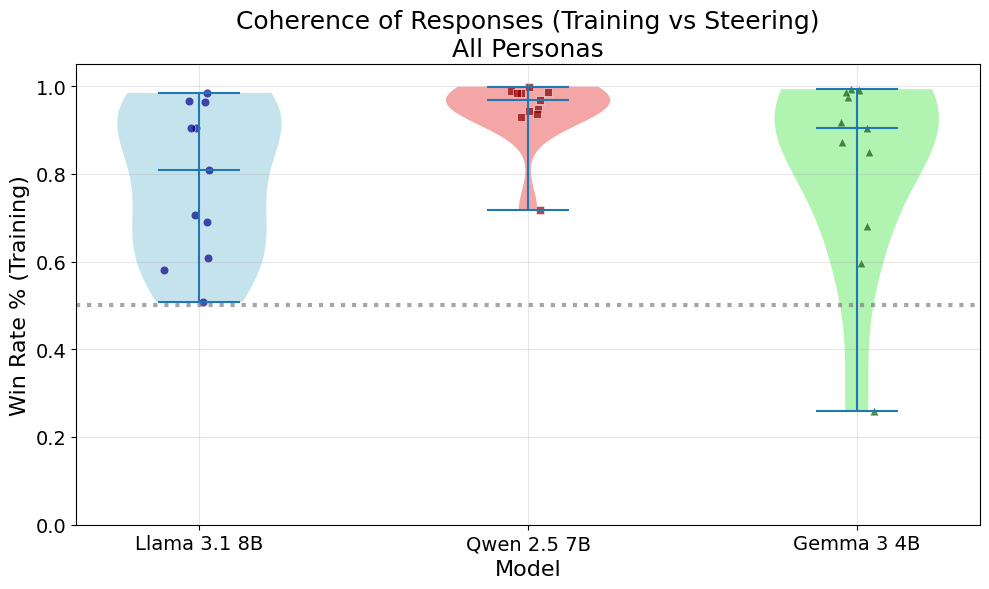

In [2]:
models = ["llama-3.1-8b-it", "qwen-2.5-7b-it", "gemma-3-4b-it"]
model_labels = ['Llama 3.1 8B', 'Qwen 2.5 7B', 'Gemma 3 4B']

# Load data for all models
all_data = []
for model in models:
    PATH = f"{DATA_PATH}/robustness/{model}/coherence_w_traits.jsonl"
    data = pd.read_json(PATH, orient="records", lines=True)
    data['model'] = model
    all_data.append(data)

# Combine all data
combined_data = pd.concat(all_data, ignore_index=True)

# Create violin plot
plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightcoral', 'lightgreen']
marker_colors = ['darkblue', 'darkred', 'darkgreen']
markers = ['o', 's', '^']

# Prepare data for violin plot
data_for_violinplot = [combined_data[combined_data['model'] == model]['win_rate'] for model in models]
violin_parts = plt.violinplot(data_for_violinplot, positions=range(1, len(models) + 1), showextrema=True, showmedians=True)

# Color each violin
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

# Add individual points with jitter
for i, model in enumerate(models):
    model_data = combined_data[combined_data['model'] == model]['win_rate']
    x_position = i + 1
    x_jitter = np.random.normal(0, 0.04, size=len(model_data))
    plt.scatter(x_position + x_jitter, model_data, alpha=0.7, s=40, 
               color=marker_colors[i], edgecolors='white', linewidth=0.5, marker=markers[i])

# Add 50% reference line
plt.axhline(y=0.5, color='grey', linestyle=':', alpha=0.7, linewidth=3)

plt.ylim(0, 1.05)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Win Rate % (Training)', fontsize=16)
plt.title('Coherence of Responses (Training vs Steering)\nAll Personas', fontsize=18)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(models) + 1), model_labels, fontsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.savefig("/workspace/PersonalityTraining/figures/coherence.png", dpi=400)
plt.show()